In [8]:
#Importing the modules needed for the follwing script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Reading in the data from the csv file
df = pd.read_csv("combined_file.csv")
df


C:\Users\lif\AppData\Local\Temp\ipykernel_8856\4245932074.py:2: DtypeWarning: Columns (1,3,5,8,9,10,12,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_file.csv")


Unnamed: 0          ts                 id.orig_h id.orig_p  \
0               0  1688523383             192.168.0.165     34316   
1               1  1688523383  fe80::577:447c:19ae:cff5     38222   
2               2  1688523384             192.168.0.165     60018   
3               3  1688523384  fe80::577:447c:19ae:cff5     57724   
4               4  1688523385             192.168.0.165     43083   
...           ...         ...                       ...       ...   
90334       90334  1686164129             192.168.0.150     57911   
90335       90335  1686001074               192.168.0.1     40018   
90336       90336  1686001074         fdf0:f574:be1e::1     50826   
90337       90337  1686001074         fdf0:f574:be1e::1     50826   
90338       90338  1686001074  fe80::e0e:76ff:fedc:1d2f     50826   

             id.resp_h id.resp_p proto service     duration  orig_bytes  \
0          224.0.0.251      5353   udp     dns     0.000936          45   
1             ff02::fb      5353   udp     dns     0.000944          45   
2          224.0.0.251      5353   udp     dns     0.000799          46   
3             ff02::fb      5353   udp     dns     0.001447          46   
4          224.0.0.251      5353   udp     dns     0.002282          29   
...                ...       ...   ...     ...          ...         ...   
90334    52.184.214.53       443   tcp     ssl     0.214845      1309.0   
90335  239.255.255.250      1900   udp    None  163171.7984  52909440.0   
90336          ff05::c      1900   udp    None  163171.8002  53148800.0   
90337          ff0e::c      1900   udp    None  163171.7989  53145196.0   
90338          ff02::c      1900   udp    None  163171.8008  53148800.0   

      resp_bytes conn_state missed_bytes   history orig_pkts orig_ip_bytes  \
0              0         S0            0        CD         1            73   
1              0         S0            0        CD         1            93   
2              0         S0            0        CD         1            74   
3              0         S0            0        CD         1            94   
4              0         S0            0        CD         1            57   
...          ...        ...          ...       ...       ...           ...   
90334     3102.0         S1         2433  ShADcgda        12          1801   
90335        0.0         S0            0         D    119680      56260480   
90336        0.0         S0            0         D    119680      58893440   
90337        0.0         S0            0         D    119672      58889452   
90338        0.0         S0            0         D    119680      58893440   

      resp_pkts resp_ip_bytes  label detailed_label  
0             0             0      1      malicious  
1             0             0      1      malicious  
2             0             0      1      malicious  
3             0             0      1      malicious  
4             0             0      1      malicious  
...         ...           ...    ...            ...  
90334         8          1001      0         benign  
90335         0             0      0         benign  
90336         0             0      0         benign  
90337         0             0      0         benign  
90338         0             0      0         benign  

[90339 rows x 20 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90339 entries, 0 to 90338
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      90339 non-null  int64 
 1   ts              90339 non-null  object
 2   id.orig_h       90339 non-null  object
 3   id.orig_p       90339 non-null  object
 4   id.resp_h       90339 non-null  object
 5   id.resp_p       90339 non-null  object
 6   proto           90339 non-null  object
 7   service         90339 non-null  object
 8   duration        37867 non-null  object
 9   orig_bytes      37867 non-null  object
 10  resp_bytes      37867 non-null  object
 11  conn_state      90339 non-null  object
 12  missed_bytes    90339 non-null  object
 13  history         90339 non-null  object
 14  orig_pkts       90339 non-null  object
 15  orig_ip_bytes   90339 non-null  object
 16  resp_pkts       90339 non-null  object
 17  resp_ip_bytes   90339 non-null  object
 18  label 

In [12]:
df['network_bytes'] = df['orig_bytes'] + df['resp_bytes']
df.head()

Unnamed: 0          ts                 id.orig_h id.orig_p    id.resp_h  \
0           0  1688523383             192.168.0.165     34316  224.0.0.251   
1           1  1688523383  fe80::577:447c:19ae:cff5     38222     ff02::fb   
2           2  1688523384             192.168.0.165     60018  224.0.0.251   
3           3  1688523384  fe80::577:447c:19ae:cff5     57724     ff02::fb   
4           4  1688523385             192.168.0.165     43083  224.0.0.251   

  id.resp_p proto service  duration orig_bytes  ... conn_state missed_bytes  \
0      5353   udp     dns  0.000936         45  ...         S0            0   
1      5353   udp     dns  0.000944         45  ...         S0            0   
2      5353   udp     dns  0.000799         46  ...         S0            0   
3      5353   udp     dns  0.001447         46  ...         S0            0   
4      5353   udp     dns  0.002282         29  ...         S0            0   

  history orig_pkts orig_ip_bytes resp_pkts resp_ip_bytes label  \
0      CD         1            73         0             0     1   
1      CD         1            93         0             0     1   
2      CD         1            74         0             0     1   
3      CD         1            94         0             0     1   
4      CD         1            57         0             0     1   

   detailed_label network_bytes  
0       malicious           450  
1       malicious           450  
2       malicious           460  
3       malicious           460  
4       malicious           290  

[5 rows x 21 columns]

In [13]:
df['detailed_label'].value_counts()

malicious    52606
benign       37733
Name: detailed_label, dtype: int64

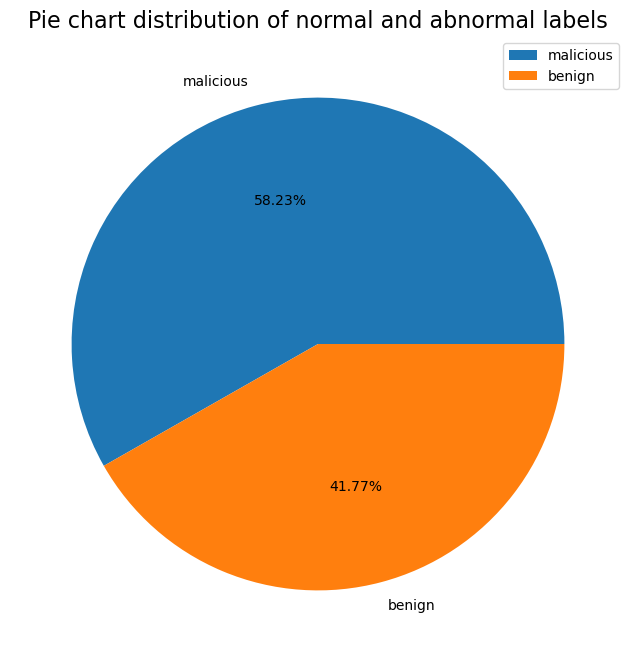

In [15]:
plt.figure(figsize=(8,8))
plt.pie(df.label.value_counts(), labels = ['malicious','benign'], autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('Pie_chart_binary.png')
plt.show()

In [16]:
df = df.drop('Unnamed: 0', axis=1)

In [17]:
df

ts                 id.orig_h id.orig_p        id.resp_h  \
0      1688523383             192.168.0.165     34316      224.0.0.251   
1      1688523383  fe80::577:447c:19ae:cff5     38222         ff02::fb   
2      1688523384             192.168.0.165     60018      224.0.0.251   
3      1688523384  fe80::577:447c:19ae:cff5     57724         ff02::fb   
4      1688523385             192.168.0.165     43083      224.0.0.251   
...           ...                       ...       ...              ...   
90334  1686164129             192.168.0.150     57911    52.184.214.53   
90335  1686001074               192.168.0.1     40018  239.255.255.250   
90336  1686001074         fdf0:f574:be1e::1     50826          ff05::c   
90337  1686001074         fdf0:f574:be1e::1     50826          ff0e::c   
90338  1686001074  fe80::e0e:76ff:fedc:1d2f     50826          ff02::c   

      id.resp_p proto service     duration  orig_bytes resp_bytes conn_state  \
0          5353   udp     dns     0.000936          45          0         S0   
1          5353   udp     dns     0.000944          45          0         S0   
2          5353   udp     dns     0.000799          46          0         S0   
3          5353   udp     dns     0.001447          46          0         S0   
4          5353   udp     dns     0.002282          29          0         S0   
...         ...   ...     ...          ...         ...        ...        ...   
90334       443   tcp     ssl     0.214845      1309.0     3102.0         S1   
90335      1900   udp    None  163171.7984  52909440.0        0.0         S0   
90336      1900   udp    None  163171.8002  53148800.0        0.0         S0   
90337      1900   udp    None  163171.7989  53145196.0        0.0         S0   
90338      1900   udp    None  163171.8008  53148800.0        0.0         S0   

      missed_bytes   history orig_pkts orig_ip_bytes resp_pkts resp_ip_bytes  \
0                0        CD         1            73         0             0   
1                0        CD         1            93         0             0   
2                0        CD         1            74         0             0   
3                0        CD         1            94         0             0   
4                0        CD         1            57         0             0   
...            ...       ...       ...           ...       ...           ...   
90334         2433  ShADcgda        12          1801         8          1001   
90335            0         D    119680      56260480         0             0   
90336            0         D    119680      58893440         0             0   
90337            0         D    119672      58889452         0             0   
90338            0         D    119680      58893440         0             0   

       label detailed_label  network_bytes  
0          1      malicious            450  
1          1      malicious            450  
2          1      malicious            460  
3          1      malicious            460  
4          1      malicious            290  
...      ...            ...            ...  
90334      0         benign   1309.03102.0  
90335      0         benign  52909440.00.0  
90336      0         benign  53148800.00.0  
90337      0         benign  53145196.00.0  
90338      0         benign  53148800.00.0  

[90339 rows x 20 columns]

In [18]:
df.drop(['detailed_label'], axis=1, inplace=True)

In [42]:
df.to_csv('finaltest.csv')

In [30]:
num_col = df.select_dtypes(include = 'float64' and 'int64')

#some ahve been left out
duration = df['duration']
resp_bytes = df['resp_bytes']
orig_bytes = df['orig_bytes']

num_col['duration'] = duration
num_col['resp_bytes'] = resp_bytes
num_col['orig_bytes'] = orig_bytes

num_col

label     duration resp_bytes  orig_bytes
0          1     0.000936          0          45
1          1     0.000944          0          45
2          1     0.000799          0          46
3          1     0.001447          0          46
4          1     0.002282          0          29
...      ...          ...        ...         ...
90334      0     0.214845     3102.0      1309.0
90335      0  163171.7984        0.0  52909440.0
90336      0  163171.8002        0.0  53148800.0
90337      0  163171.7989        0.0  53145196.0
90338      0  163171.8008        0.0  53148800.0

[90339 rows x 4 columns]

In [22]:
df['ts'] = df['ts'].astype('float64').astype('int64')


ValueError: could not convert string to float: '#fields'

In [27]:
df['ts'].dtype


dtype('O')

In [37]:
#num_col = df.select_dtypes(include='float64' and 'int64').columns
cat_col = df.select_dtypes(include = 'object')
cat_col

id.orig_h id.orig_p        id.resp_h id.resp_p proto  \
0                 192.168.0.165     34316      224.0.0.251      5353   udp   
1      fe80::577:447c:19ae:cff5     38222         ff02::fb      5353   udp   
2                 192.168.0.165     60018      224.0.0.251      5353   udp   
3      fe80::577:447c:19ae:cff5     57724         ff02::fb      5353   udp   
4                 192.168.0.165     43083      224.0.0.251      5353   udp   
...                         ...       ...              ...       ...   ...   
90334             192.168.0.150     57911    52.184.214.53       443   tcp   
90335               192.168.0.1     40018  239.255.255.250      1900   udp   
90336         fdf0:f574:be1e::1     50826          ff05::c      1900   udp   
90337         fdf0:f574:be1e::1     50826          ff0e::c      1900   udp   
90338  fe80::e0e:76ff:fedc:1d2f     50826          ff02::c      1900   udp   

      service     duration  orig_bytes resp_bytes conn_state missed_bytes  \
0         dns     0.000936          45          0         S0            0   
1         dns     0.000944          45          0         S0            0   
2         dns     0.000799          46          0         S0            0   
3         dns     0.001447          46          0         S0            0   
4         dns     0.002282          29          0         S0            0   
...       ...          ...         ...        ...        ...          ...   
90334     ssl     0.214845      1309.0     3102.0         S1         2433   
90335    None  163171.7984  52909440.0        0.0         S0            0   
90336    None  163171.8002  53148800.0        0.0         S0            0   
90337    None  163171.7989  53145196.0        0.0         S0            0   
90338    None  163171.8008  53148800.0        0.0         S0            0   

        history orig_pkts orig_ip_bytes resp_pkts resp_ip_bytes  network_bytes  
0            CD         1            73         0             0            450  
1            CD         1            93         0             0            450  
2            CD         1            74         0             0            460  
3            CD         1            94         0             0            460  
4            CD         1            57         0             0            290  
...         ...       ...           ...       ...           ...            ...  
90334  ShADcgda        12          1801         8          1001   1309.03102.0  
90335         D    119680      56260480         0             0  52909440.00.0  
90336         D    119680      58893440         0             0  53148800.00.0  
90337         D    119672      58889452         0             0  53145196.00.0  
90338         D    119680      58893440         0             0  53148800.00.0  

[90339 rows x 17 columns]

In [28]:
df['ts'] = pd.to_numeric(df['ts'], errors='coerce')
nan_count = df['ts'].isna().sum()
if nan_count == 0:
    df['column_name'] = df['column_name'].astype('int64')

In [29]:
df['ts'].dtype

dtype('float64')

In [38]:
num_col = df.select_dtypes(include = 'float64' and 'int64')

#some ahve been left out
duration = df['duration']
resp_bytes = df['resp_bytes']
orig_bytes = df['orig_bytes']

num_col['duration'] = duration
num_col['resp_bytes'] = resp_bytes
num_col['orig_bytes'] = orig_bytes

num_col

label     duration resp_bytes  orig_bytes
0          1     0.000936          0          45
1          1     0.000944          0          45
2          1     0.000799          0          46
3          1     0.001447          0          46
4          1     0.002282          0          29
...      ...          ...        ...         ...
90334      0     0.214845     3102.0      1309.0
90335      0  163171.7984        0.0  52909440.0
90336      0  163171.8002        0.0  53148800.0
90337      0  163171.7989        0.0  53145196.0
90338      0  163171.8008        0.0  53148800.0

[90339 rows x 4 columns]

In [32]:
df['ts'].dtype

dtype('float64')

In [39]:
num_col1 = df.select_dtypes(include = 'float64' and 'int64')

In [40]:
num_col1

label
0          1
1          1
2          1
3          1
4          1
...      ...
90334      0
90335      0
90336      0
90337      0
90338      0

[90339 rows x 1 columns]